## Cleaning Part

In [ ]:
import pandas

### As the data is checked only nan format that is visible is NA and the decimator is ; So lets read our csv to a variable called data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = '/content/drive/My Drive/airbnb_europe_data_dirty (1).csv'

Mounted at /content/drive


In [ ]:
data = pandas.read_csv(file_path, sep=";", na_values=["NA", "nan", "Nan"])

### Lets first check the NAN rates of each column to decide if we should remove a column by its own

In [ ]:
for column in data.columns:
    nanCount = data[column].isna().sum()
    allCount = data[column].size
    percentage = nanCount / allCount * 100

    print(column + " : " + str(nanCount) + " total: " + str(allCount) + " percentage: %" + str(percentage))

year : 107 total: 1050 percentage: %10.19047619047619
MONTH : 110 total: 1050 percentage: %10.476190476190476
city : 103 total: 1050 percentage: %9.80952380952381
REALSUM : 103 total: 1050 percentage: %9.80952380952381
room_type : 106 total: 1050 percentage: %10.095238095238095
HOST_IS_SUPERHOST : 104 total: 1050 percentage: %9.904761904761905
multi : 104 total: 1050 percentage: %9.904761904761905
BIZ : 105 total: 1050 percentage: %10.0
guest_satisfaction_overall : 108 total: 1050 percentage: %10.285714285714285
BEDROOMS : 104 total: 1050 percentage: %9.904761904761905
dist : 106 total: 1050 percentage: %10.095238095238095
LNG : 105 total: 1050 percentage: %10.0
lat : 104 total: 1050 percentage: %9.904761904761905
CLEANLINESS_RATING : 104 total: 1050 percentage: %9.904761904761905
host_response_time : 104 total: 1050 percentage: %9.904761904761905
REVIEWS_PER_MONTH : 103 total: 1050 percentage: %9.80952380952381


### As it can be observed there is no missing data which is more than %60-65 so we shouldnt be dropping any column due to lack of data. Yet, latitude and longitude information is not useful for many cases. So it is decided to drop these columns

### Also if we make listwise deletion using data = data.dropna() we will lose almost %90 of the data which is not logical. So we will be treating each column NAN values on its own

In [ ]:
data.head()

,year,MONTH,city,REALSUM,room_type,HOST_IS_SUPERHOST,multi,BIZ,guest_satisfaction_overall,BEDROOMS,dist,LNG,lat,CLEANLINESS_RATING,host_response_time,REVIEWS_PER_MONTH
0,2020,FebRUARY,Istanbul,153.14!,moor etavirP,TRUE,TRUE,Yes,4.2,5,85.9,23.306107!,53.918315,3.7,21.8,5.2
1,2020,NaN,amsterdam,235.89,Private room,FALSE,False,no,6.3,5,3.12,-1.249937,57.194861,3,4.22,23.8
2,2017,DECEMBER,Paris!,311.23,Entire home/apt!,eurT,NaN,NO,4.8,3,NaN,-1.075102!,55.634684,4.4,2,7.7
3,2015!,yluJ,Istanbul,NaN,Shared_room,FALSE,TRUE,NaN,3.3!,5,7.12,11.749884,48.681945,NaN,6.71,1.9
4,2022,April!,anolecraB,214.63,SHARED ROOM,TRUE,FALSE,yes,4.2,5,9.13,14.136342,48.462156!,3.2,17.9,17.3


In [ ]:
data.tail()

,year,MONTH,city,REALSUM,room_type,HOST_IS_SUPERHOST,multi,BIZ,guest_satisfaction_overall,BEDROOMS,dist,LNG,lat,CLEANLINESS_RATING,host_response_time,REVIEWS_PER_MONTH
1045,2021!,june,BARCELONA,305.1,Entire_home/apt,TRUE,TRUE,NaN,4.2,5,6.06,0.194445,49.643395,4.8,11.2,NaN
1046,2023,December,London,74.75,ShaRED ROOM,False!,TRUE,Yes,5,2,13.6,29.374656!,47.848771,3.5,6.7,8.4
1047,5102,rebotcO,London!,273.94,shared room,eslaF,TRUE,oN,4.2,2,2.62,334603.01,49.930601,2.3,7.4,4.1
1048,2021!,November!,Paris,250.39,ENTIRE HOME/APT,FALSE,True,no,3,1!,NaN,NaN,55.632438,4,NaN,7.92
1049,NaN,June,BRUSSELS,NaN,SHARED ROOM,False,TRUE,oN,3,3,9.43,2.044135!,41.731968,4,6.5,26.6


### Data head and tail seems to be correct which means the data is imported correctly

In [ ]:
def modify_column_name(name):
    return name.upper()

In [ ]:
data = data.rename(columns=modify_column_name)

In [ ]:
data.columns

Index(['YEAR', 'MONTH', 'CITY', 'REALSUM', 'ROOM_TYPE', 'HOST_IS_SUPERHOST',
       'MULTI', 'BIZ', 'GUEST_SATISFACTION_OVERALL', 'BEDROOMS', 'DIST', 'LNG',
       'LAT', 'CLEANLINESS_RATING', 'HOST_RESPONSE_TIME', 'REVIEWS_PER_MONTH'],
      dtype='object')

### Lets rename columns with upper letter so that it can easily be separated from the actual data to create distinction

In [ ]:
data.head()

,YEAR,MONTH,CITY,REALSUM,ROOM_TYPE,HOST_IS_SUPERHOST,MULTI,BIZ,GUEST_SATISFACTION_OVERALL,BEDROOMS,DIST,LNG,LAT,CLEANLINESS_RATING,HOST_RESPONSE_TIME,REVIEWS_PER_MONTH
0,2020,FebRUARY,Istanbul,153.14!,moor etavirP,TRUE,TRUE,Yes,4.2,5,85.9,23.306107!,53.918315,3.7,21.8,5.2
1,2020,NaN,amsterdam,235.89,Private room,FALSE,False,no,6.3,5,3.12,-1.249937,57.194861,3,4.22,23.8
2,2017,DECEMBER,Paris!,311.23,Entire home/apt!,eurT,NaN,NO,4.8,3,NaN,-1.075102!,55.634684,4.4,2,7.7
3,2015!,yluJ,Istanbul,NaN,Shared_room,FALSE,TRUE,NaN,3.3!,5,7.12,11.749884,48.681945,NaN,6.71,1.9
4,2022,April!,anolecraB,214.63,SHARED ROOM,TRUE,FALSE,yes,4.2,5,9.13,14.136342,48.462156!,3.2,17.9,17.3


### When the data is observed by eye, there are 3 main problems observed in each feature
### 1) both strings and some numbers such as year is written reversed eg. 2017 -> 7102 July -> yluj
### 2) there are redundant exclamation marks "!"
### 3) strings are capitalized in weird places. eg. FebRUARY

#### for each column we will create maps after decapitalizing all strings and tidy data using these methods

In [ ]:
data.drop_duplicates()

,YEAR,MONTH,CITY,REALSUM,ROOM_TYPE,HOST_IS_SUPERHOST,MULTI,BIZ,GUEST_SATISFACTION_OVERALL,BEDROOMS,DIST,LNG,LAT,CLEANLINESS_RATING,HOST_RESPONSE_TIME,REVIEWS_PER_MONTH
0,2020,FebRUARY,Istanbul,153.14!,moor etavirP,TRUE,TRUE,Yes,4.2,5,85.9,23.306107!,53.918315,3.7,21.8,5.2
1,2020,NaN,amsterdam,235.89,Private room,FALSE,False,no,6.3,5,3.12,-1.249937,57.194861,3,4.22,23.8
2,2017,DECEMBER,Paris!,311.23,Entire home/apt!,eurT,NaN,NO,4.8,3,NaN,-1.075102!,55.634684,4.4,2,7.7
3,2015!,yluJ,Istanbul,NaN,Shared_room,FALSE,TRUE,NaN,3.3!,5,7.12,11.749884,48.681945,NaN,6.71,1.9
4,2022,April!,anolecraB,214.63,SHARED ROOM,TRUE,FALSE,yes,4.2,5,9.13,14.136342,48.462156!,3.2,17.9,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2021!,june,BARCELONA,305.1,Entire_home/apt,TRUE,TRUE,NaN,4.2,5,6.06,0.194445,49.643395,4.8,11.2,NaN
1046,2023,December,London,74.75,ShaRED ROOM,False!,TRUE,Yes,5,2,13.6,29.374656!,47.848771,3.5,6.7,8.4
1047,5102,rebotcO,London!,273.94,shared room,eslaF,TRUE,oN,4.2,2,2.62,334603.01,49.930601,2.3,7.4,4.1
1048,2021!,November!,Paris,250.39,ENTIRE HOME/APT,FALSE,True,no,3,1!,NaN,NaN,55.632438,4,NaN,7.92


### There seems to be no duplicate rows in the data.

### Lets start with year data

In [ ]:
mode=data['YEAR'].mode()
data['YEAR'].fillna(mode[0], inplace=True)

<ipython-input-12-8a604b63ab6a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['YEAR'].fillna(mode[0], inplace=True)


In [ ]:
data['YEAR']=data['YEAR'].str.split().str[0]
data['YEAR']=data['YEAR'].str.replace("!", "")
data['YEAR'].fillna(mode, inplace=True)
print(data['YEAR'].unique())

['2020' '2017' '2015' '2022' '1202' '2016' '2021' '2019' '2018' '2023'
 '9102' '6102' '2202' '7102' '8102' '202' '3202' '5102']


<ipython-input-13-1cf09a452f27>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['YEAR'].fillna(mode, inplace=True)


In [ ]:
print(data['YEAR'].unique())

['2020' '2017' '2015' '2022' '1202' '2016' '2021' '2019' '2018' '2023'
 '9102' '6102' '2202' '7102' '8102' '202' '3202' '5102']


In [ ]:
def fix_year(year):
    year = str(year).replace("!", "")
    if((int(year) >= 2030) or (int(year) <= 1990)):
        year = year[::-1] # reverse the string
    if year == '202':
        year = mode[0]
    return year

In [ ]:
data['YEAR'] = data['YEAR'].apply(fix_year)

In [ ]:
print(data['YEAR'].unique())

['2020' '2017' '2015' '2022' '2021' '2016' '2019' '2018' '2023']


### Summary for year column: we filled nan values with mode which should be the year that is most used in the values '2022' reversed the values that does not fit in the actual year range and now the data looks fine with unique values

### -----------------------

### For month column it is observed that the reversed problem with trailing ! is the same problem here. for a different approach it is decided to use apply function as a lambda function here
### note: again mode is decided to use to choose the most used month for nan values

In [ ]:
mode=data['MONTH'].mode()
data['MONTH'].fillna(mode[0], inplace=True)

<ipython-input-18-2adff89e4e1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MONTH'].fillna(mode[0], inplace=True)


In [ ]:
print(data['MONTH'].unique())

['FebRUARY' 'may' 'DECEMBER' 'yluJ' 'April!' 'december' 'FEBRUARY' 'May '
 'SepTEMBER' 'july' 'February' 'hcraM' 'october' 'rebmeceD' 'March!'
 'January' 'October' 'June!' 'rebotcO' 'November ' 'JulY' 'May!' 'JanUARY'
 'AugUST' 'JULY' 'June ' 'August!' 'March' 'November' 'march' 'tsuguA'
 'august' 'May' 'December ' 'July ' 'February ' 'AUGUST' 'April ' 'MARCH'
 'December!' 'February!' 'JunE' 'lirpA' 'April' 'MarCH' 'NOVEMBER'
 'yraunaJ' 'MAY' 'yaM' 'NovEMBER' 'September ' 'rebmetpeS' 'OctOBER'
 'September!' 'March ' 'JANUARY' 'SEPTEMBER' 'january' 'January '
 'November!' 'July!' 'OCTOBER' 'enuJ' 'October ' 'june' 'APRIL' 'JUNE'
 'August' 'October!' 'July' 'December' 'January!' 'yraurbeF' 'AprIL'
 'August ' 'September' 'rebmevoN' 'DecEMBER' 'september' 'november'
 'february' 'april' 'June']


In [ ]:
correct_months = [
    'january', 'february', 'march', 'april', 'may', 'june',
    'july' , 'august', 'september', 'october', 'november', 'december'
]

reversed_months_dict = {
    "yraunaj": "january",
    "yraurbef": "february",
    "hcram": "march",
    "lirpa": "april",
    "yam": "may",
    "enuj": "june",
    "yluj": "july",
    "tsugua": "august",
    "rebmetpes": "september",
    "rebotco": "october",
    "rebmevon": "november",
    "rebmeced": "december"
}



In [ ]:
def fix_month_name(month):
    month = str(month).lower();
    month = month.replace("!", "")
    month = month.replace(" ", "")

    if(month not in correct_months):
        month = reversed_months_dict[month]

    return month

In [ ]:
data["MONTH"]

,MONTH
0,FebRUARY
1,may
2,DECEMBER
3,yluJ
4,April!
...,...
1045,june
1046,December
1047,rebotcO
1048,November!


In [ ]:
data['MONTH'] = data['MONTH'].apply(fix_month_name)

In [ ]:
print(data['MONTH'].unique())

['february' 'may' 'december' 'july' 'april' 'september' 'march' 'october'
 'january' 'june' 'november' 'august']


### Unique function is a good indicator to use to see if the data is tidied.

### Also can be used to identify strings that should be used to create dictionaries.
### There can be different methods such as reversing a string if the selected string not in a list. But for now we are choosing to use dictionaries just for better readibility

### Lets try this with CITY column as well

In [ ]:
data['CITY'].unique()

array(['Istanbul', 'amsterdam', 'Paris!', 'Istanbul ', 'anolecraB',
       'Paris ', 'ISTANBUL', 'Amsterdam', nan, 'Rome ', 'London!',
       'LONDON', 'PARIS', 'Paris', 'london', 'IstANBUL', 'Barcelona ',
       'London', 'Prague', 'barcelona', 'PRAGUE', 'paris', 'LonDON',
       'BRUSSELS', 'istanbul', 'BARCELONA', 'Barcelona!', 'brussels',
       'madretsmA', 'Barcelona', 'Rome!', 'RomE', 'Brussels', 'Rome',
       'AMSTERDAM', 'BarCELONA', 'Prague!', 'AmsTERDAM', 'Brussels ',
       'eugarP', 'London ', 'siraP', 'slessurB', 'Prague ', 'prague',
       'PraGUE', 'Brussels!', 'BruSSELS', 'emoR', 'nodnoL', 'Amsterdam!',
       'rome', 'lubnatsI', 'ROME', 'Amsterdam ', 'ParIS', 'Istanbul!'],
      dtype=object)

In [ ]:
data['CITY'] = data['CITY'].str.lower()
data['CITY'] = data['CITY'].str.replace("!", "")
data['CITY'] = data['CITY'].str.replace(" ", "")
mode=data['CITY'].mode()
data['CITY'].fillna(mode[0], inplace=True)

reversed_cities_dict = {
    "lubnatsi": "istanbul",
    "nodnol": "london",
    "sirap": "paris",
    "lirpa": "april",
    "eugarp": "prague",
    "slessurb": "brussels",
    "anolecrab": "barcelona",
    "emor": "rome",
    "madretsma": "amsterdam"
}

def fix_city_name(city):
    try:
        city = reversed_cities_dict[city]
    except:
        city = city
    return city

data['CITY'] = data['CITY'].apply(fix_city_name)


<ipython-input-26-16df6dbbcc1b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CITY'].fillna(mode[0], inplace=True)


In [ ]:
data['CITY'].unique()

array(['istanbul', 'amsterdam', 'paris', 'barcelona', 'rome', 'london',
       'prague', 'brussels'], dtype=object)

In [ ]:
data

,YEAR,MONTH,CITY,REALSUM,ROOM_TYPE,HOST_IS_SUPERHOST,MULTI,BIZ,GUEST_SATISFACTION_OVERALL,BEDROOMS,DIST,LNG,LAT,CLEANLINESS_RATING,HOST_RESPONSE_TIME,REVIEWS_PER_MONTH
0,2020,february,istanbul,153.14!,moor etavirP,TRUE,TRUE,Yes,4.2,5,85.9,23.306107!,53.918315,3.7,21.8,5.2
1,2020,may,amsterdam,235.89,Private room,FALSE,False,no,6.3,5,3.12,-1.249937,57.194861,3,4.22,23.8
2,2017,december,paris,311.23,Entire home/apt!,eurT,NaN,NO,4.8,3,NaN,-1.075102!,55.634684,4.4,2,7.7
3,2015,july,istanbul,NaN,Shared_room,FALSE,TRUE,NaN,3.3!,5,7.12,11.749884,48.681945,NaN,6.71,1.9
4,2022,april,barcelona,214.63,SHARED ROOM,TRUE,FALSE,yes,4.2,5,9.13,14.136342,48.462156!,3.2,17.9,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2021,june,barcelona,305.1,Entire_home/apt,TRUE,TRUE,NaN,4.2,5,6.06,0.194445,49.643395,4.8,11.2,NaN
1046,2023,december,london,74.75,ShaRED ROOM,False!,TRUE,Yes,5,2,13.6,29.374656!,47.848771,3.5,6.7,8.4
1047,2015,october,london,273.94,shared room,eslaF,TRUE,oN,4.2,2,2.62,334603.01,49.930601,2.3,7.4,4.1
1048,2021,november,paris,250.39,ENTIRE HOME/APT,FALSE,True,no,3,1!,NaN,NaN,55.632438,4,NaN,7.92


### For REALSUM Column it is decided to use mean filling instead of mode. filling with mean will not be effecting the statistical mean of the data and this will be the most useful filling method for float type features.

In [ ]:
data['REALSUM']

,REALSUM
0,153.14!
1,235.89
2,311.23
3,NaN
4,214.63
...,...
1045,305.1
1046,74.75
1047,273.94
1048,250.39


### First redundant strings are removed and the field converted to numeri

In [ ]:
data['REALSUM']=data['REALSUM'].str.split().str[0]
data['REALSUM']=data['REALSUM'].str.replace("!", "")
data['REALSUM']=data['REALSUM'].str.replace(" ", "")

data['REALSUM']=data['REALSUM'].apply(pandas.to_numeric)

mean=data['REALSUM'].mean()
data['REALSUM'].fillna(mean, inplace=True)

<ipython-input-30-8113a1aec8e6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['REALSUM'].fillna(mean, inplace=True)


In [ ]:
mean

239.91002745512148

In [ ]:
data

,YEAR,MONTH,CITY,REALSUM,ROOM_TYPE,HOST_IS_SUPERHOST,MULTI,BIZ,GUEST_SATISFACTION_OVERALL,BEDROOMS,DIST,LNG,LAT,CLEANLINESS_RATING,HOST_RESPONSE_TIME,REVIEWS_PER_MONTH
0,2020,february,istanbul,153.140000,moor etavirP,TRUE,TRUE,Yes,4.2,5,85.9,23.306107!,53.918315,3.7,21.8,5.2
1,2020,may,amsterdam,235.890000,Private room,FALSE,False,no,6.3,5,3.12,-1.249937,57.194861,3,4.22,23.8
2,2017,december,paris,311.230000,Entire home/apt!,eurT,NaN,NO,4.8,3,NaN,-1.075102!,55.634684,4.4,2,7.7
3,2015,july,istanbul,239.910027,Shared_room,FALSE,TRUE,NaN,3.3!,5,7.12,11.749884,48.681945,NaN,6.71,1.9
4,2022,april,barcelona,214.630000,SHARED ROOM,TRUE,FALSE,yes,4.2,5,9.13,14.136342,48.462156!,3.2,17.9,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2021,june,barcelona,305.100000,Entire_home/apt,TRUE,TRUE,NaN,4.2,5,6.06,0.194445,49.643395,4.8,11.2,NaN
1046,2023,december,london,74.750000,ShaRED ROOM,False!,TRUE,Yes,5,2,13.6,29.374656!,47.848771,3.5,6.7,8.4
1047,2015,october,london,273.940000,shared room,eslaF,TRUE,oN,4.2,2,2.62,334603.01,49.930601,2.3,7.4,4.1
1048,2021,november,paris,250.390000,ENTIRE HOME/APT,FALSE,True,no,3,1!,NaN,NaN,55.632438,4,NaN,7.92


In [ ]:
data[:]

,YEAR,MONTH,CITY,REALSUM,ROOM_TYPE,HOST_IS_SUPERHOST,MULTI,BIZ,GUEST_SATISFACTION_OVERALL,BEDROOMS,DIST,LNG,LAT,CLEANLINESS_RATING,HOST_RESPONSE_TIME,REVIEWS_PER_MONTH
0,2020,february,istanbul,153.140000,moor etavirP,TRUE,TRUE,Yes,4.2,5,85.9,23.306107!,53.918315,3.7,21.8,5.2
1,2020,may,amsterdam,235.890000,Private room,FALSE,False,no,6.3,5,3.12,-1.249937,57.194861,3,4.22,23.8
2,2017,december,paris,311.230000,Entire home/apt!,eurT,NaN,NO,4.8,3,NaN,-1.075102!,55.634684,4.4,2,7.7
3,2015,july,istanbul,239.910027,Shared_room,FALSE,TRUE,NaN,3.3!,5,7.12,11.749884,48.681945,NaN,6.71,1.9
4,2022,april,barcelona,214.630000,SHARED ROOM,TRUE,FALSE,yes,4.2,5,9.13,14.136342,48.462156!,3.2,17.9,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2021,june,barcelona,305.100000,Entire_home/apt,TRUE,TRUE,NaN,4.2,5,6.06,0.194445,49.643395,4.8,11.2,NaN
1046,2023,december,london,74.750000,ShaRED ROOM,False!,TRUE,Yes,5,2,13.6,29.374656!,47.848771,3.5,6.7,8.4
1047,2015,october,london,273.940000,shared room,eslaF,TRUE,oN,4.2,2,2.62,334603.01,49.930601,2.3,7.4,4.1
1048,2021,november,paris,250.390000,ENTIRE HOME/APT,FALSE,True,no,3,1!,NaN,NaN,55.632438,4,NaN,7.92


In [ ]:
mode=data['ROOM_TYPE'].mode()
data['ROOM_TYPE'].fillna(mode[0], inplace=True)

correct_rooms = [
    'private room', 'entire home/apt', 'shared room']

reversed_rooms_dictionary = {
    'mooretavirp' : "private room",
    'sharedroom' : "shared room",
    'privateroom' : "private room",
    'entirehome/apt' : 'entire home/apt',
    'moorderahs' : "shared room",
    'tpa/emoheritne' : 'entire home/apt'
}


def fix_room_type(room_type):
    room_type = room_type.replace("!", "")
    room_type = room_type.replace(" ", "")
    room_type = room_type.replace("_", "")
    room_type = str(room_type).lower();
    room_type = reversed_rooms_dictionary[room_type]

    return room_type

<ipython-input-34-bc4fc886a505>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ROOM_TYPE'].fillna(mode[0], inplace=True)


In [ ]:
data['ROOM_TYPE'] = data['ROOM_TYPE'].apply(fix_room_type)

In [ ]:
data

,YEAR,MONTH,CITY,REALSUM,ROOM_TYPE,HOST_IS_SUPERHOST,MULTI,BIZ,GUEST_SATISFACTION_OVERALL,BEDROOMS,DIST,LNG,LAT,CLEANLINESS_RATING,HOST_RESPONSE_TIME,REVIEWS_PER_MONTH
0,2020,february,istanbul,153.140000,private room,TRUE,TRUE,Yes,4.2,5,85.9,23.306107!,53.918315,3.7,21.8,5.2
1,2020,may,amsterdam,235.890000,private room,FALSE,False,no,6.3,5,3.12,-1.249937,57.194861,3,4.22,23.8
2,2017,december,paris,311.230000,entire home/apt,eurT,NaN,NO,4.8,3,NaN,-1.075102!,55.634684,4.4,2,7.7
3,2015,july,istanbul,239.910027,shared room,FALSE,TRUE,NaN,3.3!,5,7.12,11.749884,48.681945,NaN,6.71,1.9
4,2022,april,barcelona,214.630000,shared room,TRUE,FALSE,yes,4.2,5,9.13,14.136342,48.462156!,3.2,17.9,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2021,june,barcelona,305.100000,entire home/apt,TRUE,TRUE,NaN,4.2,5,6.06,0.194445,49.643395,4.8,11.2,NaN
1046,2023,december,london,74.750000,shared room,False!,TRUE,Yes,5,2,13.6,29.374656!,47.848771,3.5,6.7,8.4
1047,2015,october,london,273.940000,shared room,eslaF,TRUE,oN,4.2,2,2.62,334603.01,49.930601,2.3,7.4,4.1
1048,2021,november,paris,250.390000,entire home/apt,FALSE,True,no,3,1!,NaN,NaN,55.632438,4,NaN,7.92


### Exact same approach with the CITY, MONTH, ROOM_TYPE and other string type fields is used. This will not be detailed in the further code Also with the fields 'true false' and 'yes no' a common function is being used. we created redundant dictionary fields that points to itself like 'true' : 'true' to avoid try catch calls.

In [ ]:
reversed_true_false_dictionary = {
    'true' : 'true',
    'false' : 'false',
    'eurt' : 'true',
    'eslaf' : 'false'
}

reversed_yes_no_dictionary = {
    'yes' : 'yes',
    'no' : 'no',
    'sey' : 'yes',
    'on' : 'no'
}


def fix_true_false(inputstr):
    inputstr = inputstr.replace("!", "")
    inputstr = inputstr.replace(" ", "")
    inputstr = inputstr.replace("_", "")
    inputstr = str(inputstr).lower();
    inputstr = reversed_true_false_dictionary[inputstr]

    return inputstr

def fix_yes_no(inputstr):
    inputstr = inputstr.replace("!", "")
    inputstr = inputstr.replace(" ", "")
    inputstr = inputstr.replace("_", "")
    inputstr = str(inputstr).lower();
    inputstr = reversed_yes_no_dictionary[inputstr]

    return inputstr

mode=data['HOST_IS_SUPERHOST'].mode()
data['HOST_IS_SUPERHOST'].fillna(mode[0], inplace=True)
data['HOST_IS_SUPERHOST'] = data['HOST_IS_SUPERHOST'].apply(fix_true_false)

mode=data['MULTI'].mode()
data['MULTI'].fillna(mode[0], inplace=True)
data['MULTI'] = data['MULTI'].apply(fix_true_false)

mode=data['BIZ'].mode()
data['BIZ'].fillna(mode[0], inplace=True)
data['BIZ'] = data['BIZ'].apply(fix_yes_no)

<ipython-input-37-da9dd1229e44>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['HOST_IS_SUPERHOST'].fillna(mode[0], inplace=True)
<ipython-input-37-da9dd1229e44>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
data

,YEAR,MONTH,CITY,REALSUM,ROOM_TYPE,HOST_IS_SUPERHOST,MULTI,BIZ,GUEST_SATISFACTION_OVERALL,BEDROOMS,DIST,LNG,LAT,CLEANLINESS_RATING,HOST_RESPONSE_TIME,REVIEWS_PER_MONTH
0,2020,february,istanbul,153.140000,private room,true,true,yes,4.2,5,85.9,23.306107!,53.918315,3.7,21.8,5.2
1,2020,may,amsterdam,235.890000,private room,false,false,no,6.3,5,3.12,-1.249937,57.194861,3,4.22,23.8
2,2017,december,paris,311.230000,entire home/apt,true,false,no,4.8,3,NaN,-1.075102!,55.634684,4.4,2,7.7
3,2015,july,istanbul,239.910027,shared room,false,true,yes,3.3!,5,7.12,11.749884,48.681945,NaN,6.71,1.9
4,2022,april,barcelona,214.630000,shared room,true,false,yes,4.2,5,9.13,14.136342,48.462156!,3.2,17.9,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2021,june,barcelona,305.100000,entire home/apt,true,true,yes,4.2,5,6.06,0.194445,49.643395,4.8,11.2,NaN
1046,2023,december,london,74.750000,shared room,false,true,yes,5,2,13.6,29.374656!,47.848771,3.5,6.7,8.4
1047,2015,october,london,273.940000,shared room,false,true,no,4.2,2,2.62,334603.01,49.930601,2.3,7.4,4.1
1048,2021,november,paris,250.390000,entire home/apt,false,true,no,3,1!,NaN,NaN,55.632438,4,NaN,7.92


In [ ]:
float_keys = ['GUEST_SATISFACTION_OVERALL' , 'BEDROOMS', 'DIST', 'LNG', 'LAT', 'CLEANLINESS_RATING', 'HOST_RESPONSE_TIME', 'REVIEWS_PER_MONTH']


for key in float_keys:

    data[key]=data[key].str.split().str[0]
    data[key]=data[key].str.replace("!", "")
    data[key]=data[key].str.replace(" ", "")

    data[key]=data[key].apply(pandas.to_numeric)

    mean=data[key].mean()
    data[key].fillna(mean, inplace=True)


<ipython-input-39-1369a215ecc3>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[key].fillna(mean, inplace=True)


### Important note:
### Using mean data filling method for LATITUDE and LONGITUDE would not make sense. The reason why we use this method is not losing data if the LAT and LNG values are missing. These data being missing would not effect the other drawings. If the drawing will be about LAT and LNG values these values(mean) should be omitted or dropped entirely

In [ ]:
data

,YEAR,MONTH,CITY,REALSUM,ROOM_TYPE,HOST_IS_SUPERHOST,MULTI,BIZ,GUEST_SATISFACTION_OVERALL,BEDROOMS,DIST,LNG,LAT,CLEANLINESS_RATING,HOST_RESPONSE_TIME,REVIEWS_PER_MONTH
0,2020,february,istanbul,153.140000,private room,true,true,yes,4.2,5.0,85.900000,23.306107,53.918315,3.700000,21.800000,5.200000
1,2020,may,amsterdam,235.890000,private room,false,false,no,6.3,5.0,3.120000,-1.249937,57.194861,3.000000,4.220000,23.800000
2,2017,december,paris,311.230000,entire home/apt,true,false,no,4.8,3.0,11.772669,-1.075102,55.634684,4.400000,2.000000,7.700000
3,2015,july,istanbul,239.910027,shared room,false,true,yes,3.3,5.0,7.120000,11.749884,48.681945,4.138266,6.710000,1.900000
4,2022,april,barcelona,214.630000,shared room,true,false,yes,4.2,5.0,9.130000,14.136342,48.462156,3.200000,17.900000,17.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2021,june,barcelona,305.100000,entire home/apt,true,true,yes,4.2,5.0,6.060000,0.194445,49.643395,4.800000,11.200000,13.406927
1046,2023,december,london,74.750000,shared room,false,true,yes,5.0,2.0,13.600000,29.374656,47.848771,3.500000,6.700000,8.400000
1047,2015,october,london,273.940000,shared room,false,true,no,4.2,2.0,2.620000,334603.010000,49.930601,2.300000,7.400000,4.100000
1048,2021,november,paris,250.390000,entire home/apt,false,true,no,3.0,1.0,11.772669,27778.172614,55.632438,4.000000,11.373996,7.920000


In [ ]:
data.to_csv('/content/drive/My Drive/xx/clean_data_end.csv', index=False)

In [ ]:
data['REALSUM']

,REALSUM
0,153.140000
1,235.890000
2,311.230000
3,239.910027
4,214.630000
...,...
1045,305.100000
1046,74.750000
1047,273.940000
1048,250.390000


## Descriptive Statistics's Graph Code

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/Users/toyguntez/Downloads/EU_Airbnb_Prices/cleaned_airbnb_data.csv'
data = pd.read_csv(file_path) 

# Creating a single figure with subplots for the requested graphs
fig, axs = plt.subplots(2, 2, figsize=(14, 10)) 

# Price Distribution
axs[0, 0].hist(data['REALSUM'], bins=20, edgecolor='black', alpha=0.7) # Using REALSUM column for price
axs[0, 0].set_title('Price Distribution of Airbnb Listings') # Adding a title to the subplot
axs[0, 0].set_xlabel('Price (€)') # Adding a label to the x-axis
axs[0, 0].set_ylabel('Frequency') # Adding a label to the y-axis

# Room Type Distribution
room_type_counts = data['ROOM_TYPE'].value_counts() # Using ROOM_TYPE column for room type
axs[0, 1].bar(room_type_counts.index, room_type_counts.values, color='skyblue') # Creating a bar plot
axs[0, 1].set_title('Room Type Distribution') # Adding a title to the subplot
axs[0, 1].set_xlabel('Room Type') # Adding a label to the x-axis
axs[0, 1].set_ylabel('Number of Listings') # Adding a label to the y-axis

# Superhost Status Distribution
superhost_counts = data['HOST_IS_SUPERHOST'].value_counts() # Using HOST_IS_SUPERHOST column for superhost status
axs[1, 0].bar(superhost_counts.index, superhost_counts.values, color='orange') # Creating a bar plot
axs[1, 0].set_title('Superhost Status Distribution') # Adding a title to the subplot
axs[1, 0].set_xlabel('Superhost Status') # Adding a label to the x-axis
axs[1, 0].set_ylabel('Number of Listings') # Adding a label to the y-axis

# City Distribution
city_counts = data['CITY'].value_counts() # Using CITY column for city
axs[1, 1].bar(city_counts.index, city_counts.values, color='green') # Creating a bar plot
axs[1, 1].set_title('Distribution of Listings Across Cities') # Adding a title to the subplot
axs[1, 1].set_xlabel('City') # Adding a label to the x-axis
axs[1, 1].set_ylabel('Number of Listings') # Adding a label to the y-axis
plt.xticks(rotation=45) # Rotating the x-axis labels for better readability

# Adjust layout for clarity
plt.tight_layout()

# Show the combined plot
plt.show()


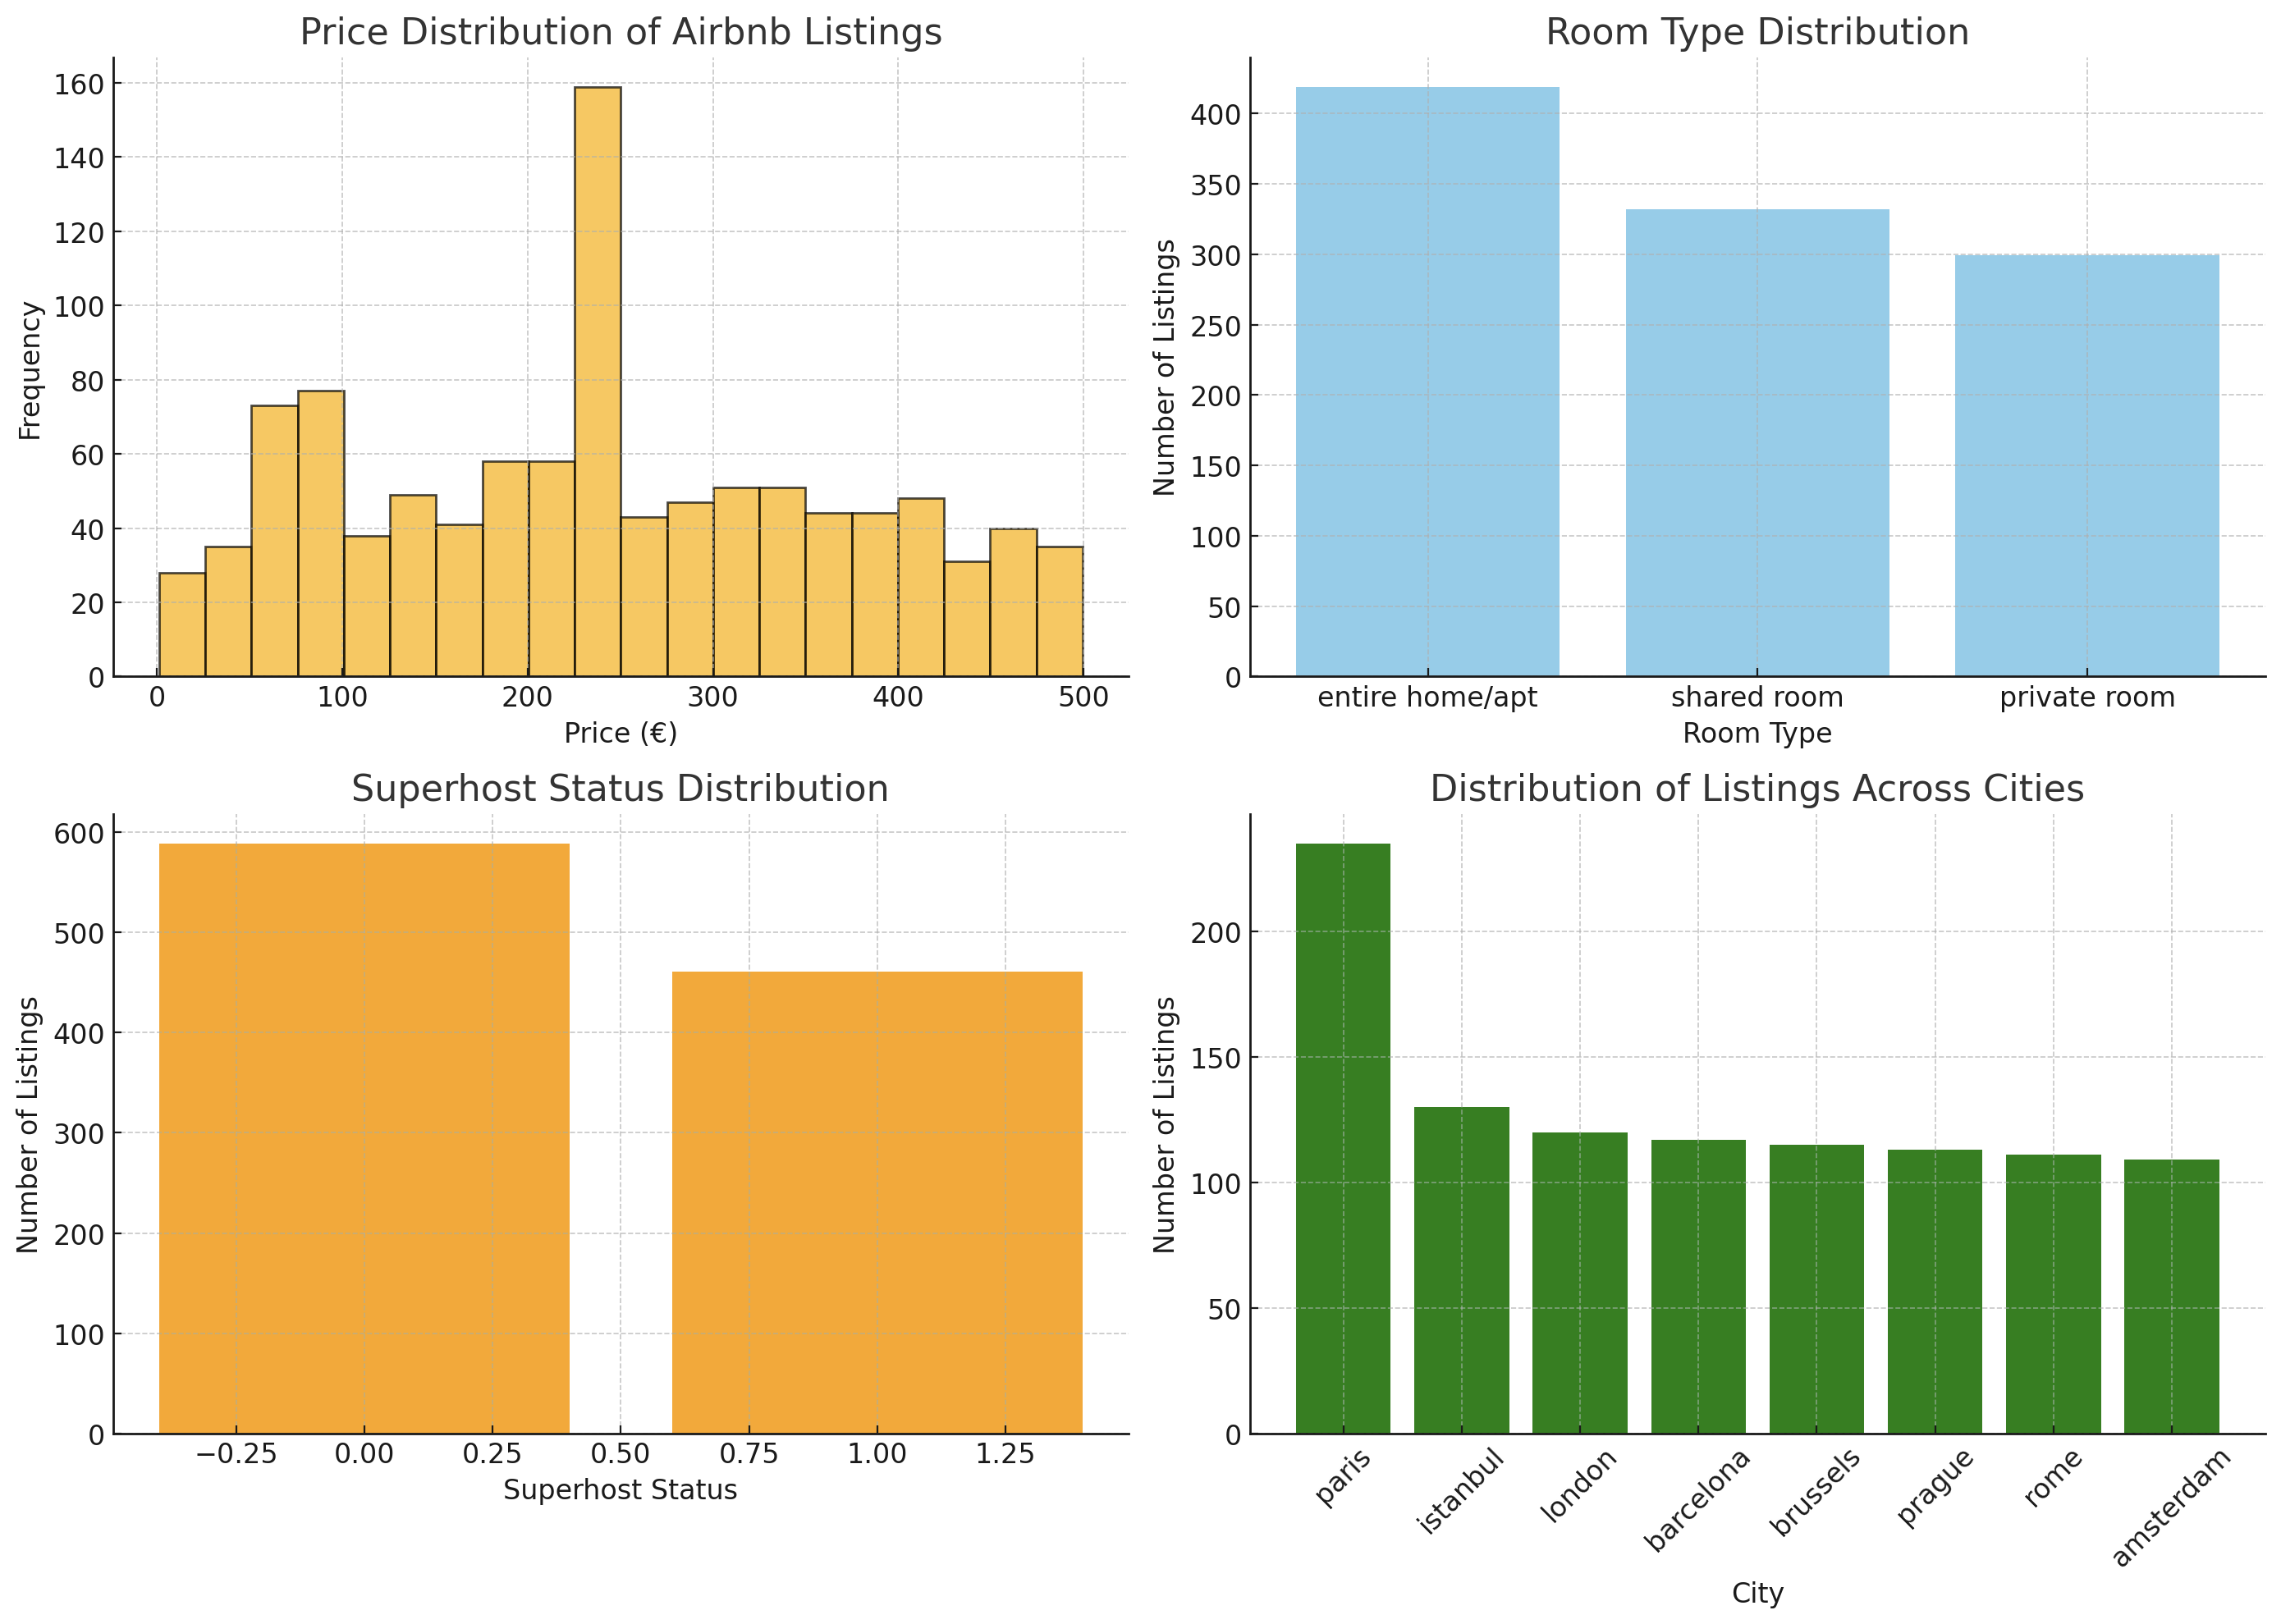

## First Research Question' Visualization Code (Fidan)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'cleaned_airbnb_data.csv'

# List of the columns which we want to read
# in order not to bloat read data we just choose the following columns to read from the actual file
cols = ['ROOM_TYPE', 'BIZ']

# Reading  the CSV file with only the necessary columns
data = pd.read_csv(file_path, usecols=cols)

# Print the data and head to verify that we read the data correctly
print(data)
print(data.head())

# HOW WERE ROOMS SHARED FOR BUSİNESS ORİENTED AND WHİCH ROOM TYPE WAS USED MORE FOR BUSİNESS ORİENTED?

# Group by 'ROOM_TYPE' and 'BIZ', and count the occurrences
grouped_data = data.groupby(['ROOM_TYPE', 'BIZ']).size().reset_index(name='Count')

# Setting the figure size for controlling dimensions and adding titles
plt.figure(figsize=(8, 5))
sns.barplot(x='ROOM_TYPE', y='Count', hue='BIZ', data=grouped_data)

# Lets also set the title and labels for each axis.
plt.title('Business Oriented Rooms by Room Type', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Count of Rooms', fontsize=12)

#Finally lets add a legend for more understandibility of the visualization.
plt.legend(title='Business Friendly', loc='upper right')

# Show the plot
plt.show()

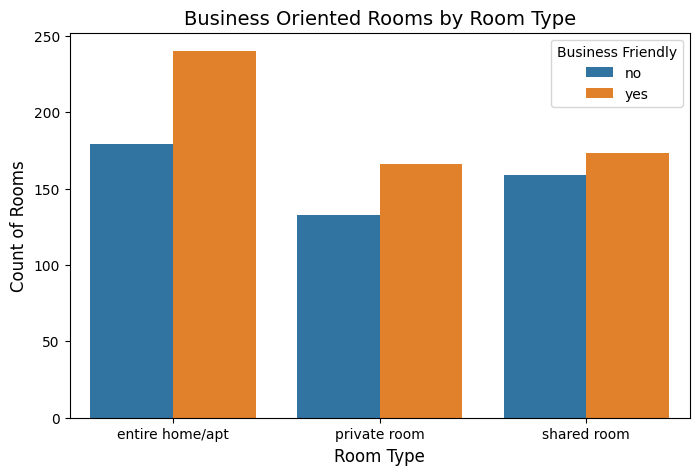

## Second Research Question' Visualization Code (Halil)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load Airbnb data from CSV
file_path = "cleaned_airbnb_data.csv"
csv_data = pd.read_csv(file_path)

# Create a boxplot
plt.figure(figsize=(8, 6))
csv_data.boxplot(column='REALSUM', by='MULTI', grid=False, patch_artist=True ,
                 boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

# Add plot titles and labels
plt.title('Relationship Between Multiple Guest Permission and Earnings', fontsize=14)
plt.suptitle('')
plt.xlabel('Allows Multiple Guests', fontsize=12)
plt.ylabel('Earnings(in $)', fontsize=12)

# Customize x-axis
plt.xticks(ticks=[1, 2], labels=['Single Guest Only', 'Multiple Guests Allowed'], fontsize=10)

# Add a y-axis grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


![Halil soru.jpeg](<attachment:Halil soru.jpeg>)
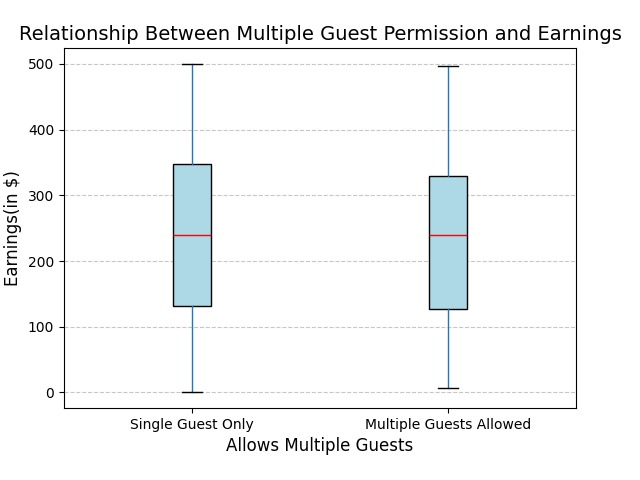

## Third Research Question' Visualization Code (İlkhan)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

# Load the data from CSV
file_path = 'cleaned_airbnb_data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Ensure data types are correct
df['YEAR'] = df['YEAR'].astype(int)
df['REALSUM'] = df['REALSUM'].astype(int)
df['REVIEWS_PER_MONTH'] = df['REVIEWS_PER_MONTH'].astype(float)

# Convert 'HOST_IS_SUPERHOST' to strings ('True'/'False')
df['HOST_IS_SUPERHOST'] = df['HOST_IS_SUPERHOST'].astype(str)

# Define a custom color palette
custom_palette = {'True': '#4169E1', 'False': '#FF5F15'}  

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'€{x:,.0f}'))

sns.lineplot(
    data=df,
    x='YEAR',
    y='REALSUM',
    hue='HOST_IS_SUPERHOST',
    marker='o',
    ax=ax1,
    palette=custom_palette,  # Apply custom color palette
    legend=False
)
ax1.set_ylabel('Pricing (in €)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
sns.barplot(
    data=df,
    x='YEAR',
    y='REVIEWS_PER_MONTH',
    hue='HOST_IS_SUPERHOST',
    alpha=1,
    ax=ax2,
    palette=custom_palette, 
    legend=False
)
ax2.set_ylabel('Reviews Per Month', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add plot title and legend
plt.title('Superhost Effect on Pricing and Review Frequency Over the Years')

line_handles = [mlines.Line2D([], [], color='black', label='Pricing', lw=2, linestyle='-'),]
bar_handles = [mpatches.Patch(color='#1f77b4', label='Superhost (Reviews)'),
               mpatches.Patch(color='#ff7f0e', label='Non-Superhost (Reviews)')]
handles = line_handles + bar_handles
ax1.legend(handles=handles, loc='upper right', title='Superhost Status')

fig.tight_layout()
plt.show()

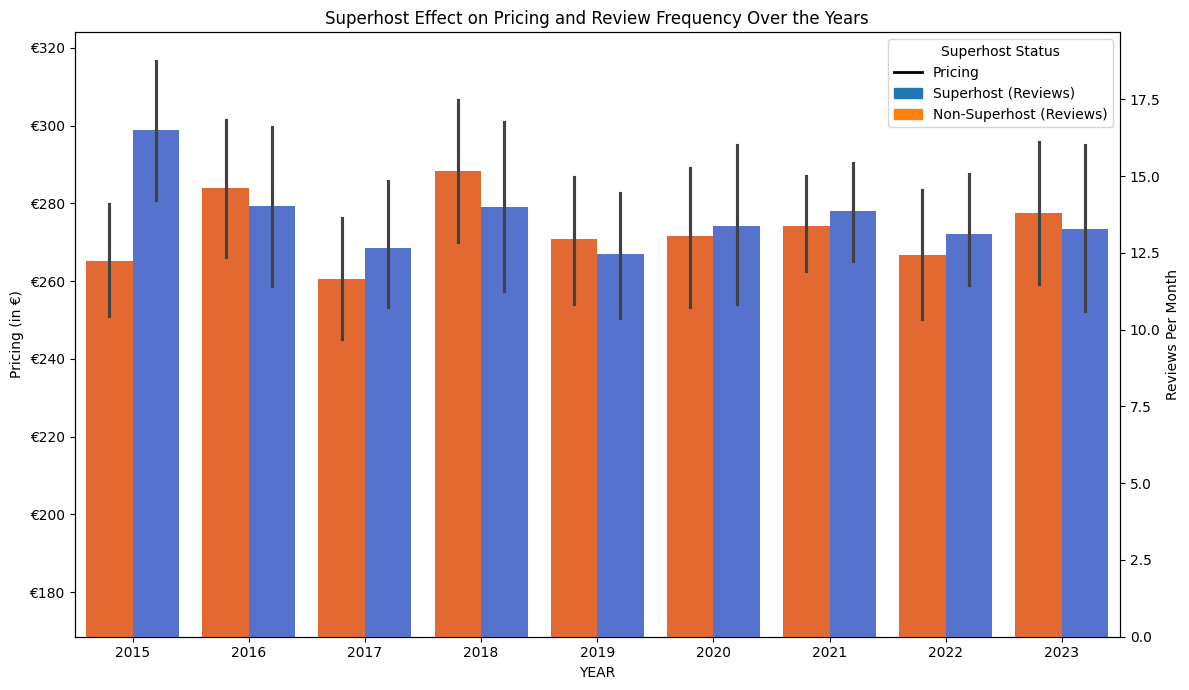

## Fourth Research Question's Visualization Code (Özgür)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# After the import commands, Firstly we should Load our dataset
file_path = 'cleaned_airbnb_data.csv'
data_new = pd.read_csv(file_path)

# Now we will filter the data to exclude outliers by limiting guest satisfaction scores to 70
filtered_data = data_new[data_new["GUEST_SATISFACTION_OVERALL"] <= 70]

# Creating the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(
    x="CITY",
    y="GUEST_SATISFACTION_OVERALL",
    data=filtered_data,
    palette="coolwarm",
    scale="width",
    inner="quartile"
)

# In this part we will Add labels and title for graph
plt.title("Guest Satisfaction Distribution by City (Violin Plot, No Outliers)", fontsize=18, weight="bold")
plt.xlabel("City", fontsize=14)
plt.ylabel("Guest Satisfaction Score", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()

# Last step is showing the graph.
plt.show()


![WhatsApp Image 2025-01-17 at 13.12.15.jpeg](<attachment:WhatsApp Image 2025-01-17 at 13.12.15.jpeg>)
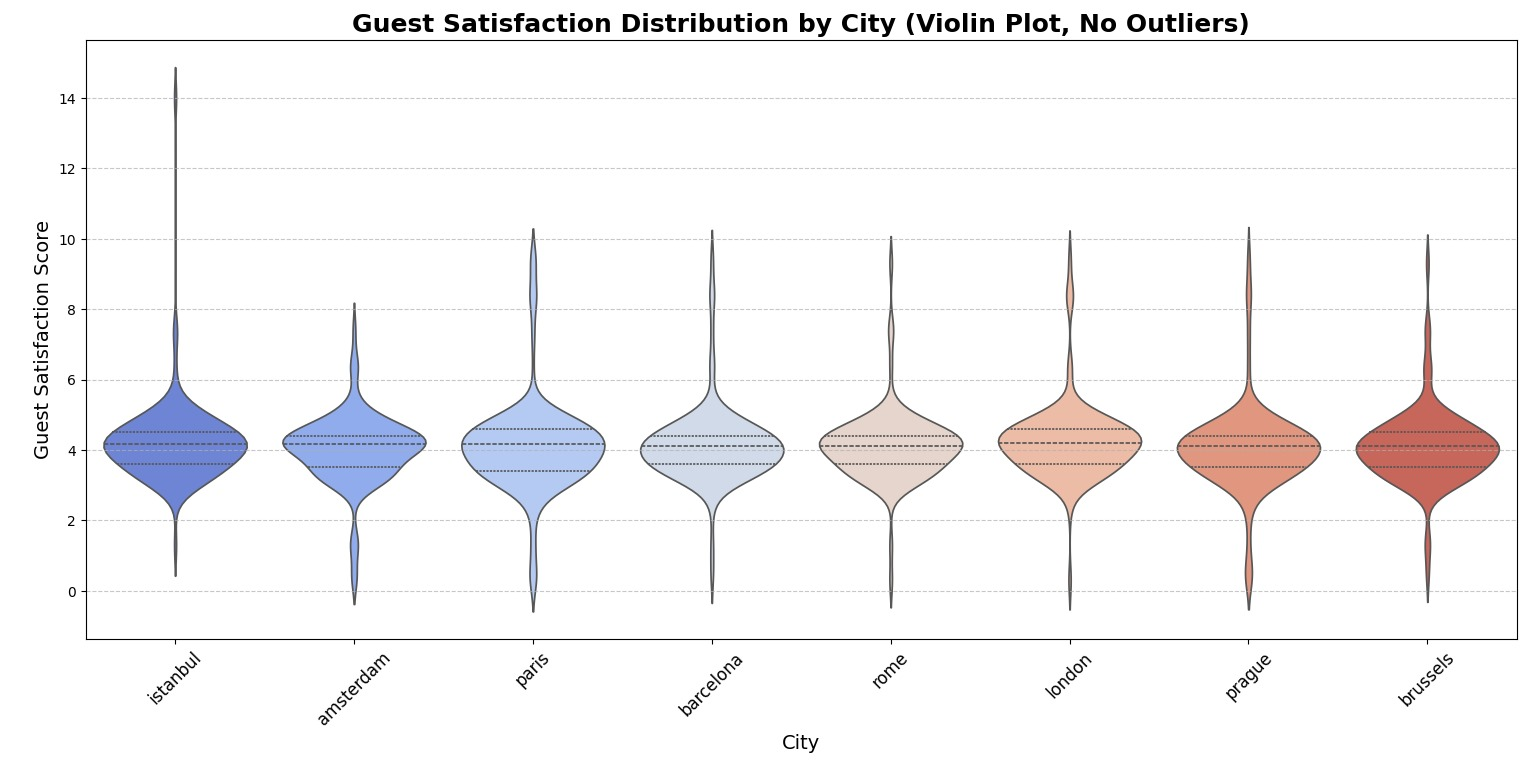

## Fifth Research Question's Visualization Code (Eren)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned Airbnb data
file_path = 'cleaned_airbnb_data.csv'
data = pd.read_csv(file_path)

# Rename columns for consistency
data.rename(columns=lambda x: x.lower(), inplace=True)  # Lowercase column names

# Filter the necessary columns and remove missing data
filtered_data = data[['reviews_per_month', 'guest_satisfaction_overall']].dropna() # Filter columns and remove missing data

# Filter the data to include only guest satisfaction ratings within the range [0, 10]
specific_range_data = filtered_data[
    (filtered_data['guest_satisfaction_overall'] >= 0) &  # Lower bound
    (filtered_data['guest_satisfaction_overall'] <= 10)   # Upper bound
]

# Group data by reviews per month and calculate the mean guest satisfaction rating
average_satisfaction_range = specific_range_data.groupby('reviews_per_month')['guest_satisfaction_overall'].mean() # Average satisfaction rating

# Create the line graph for the specific range
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(average_satisfaction_range.index, average_satisfaction_range.values, marker='o', linestyle='-', label='Average Satisfaction') # Plot the line graph
plt.title('Line Graph of Reviews Per Month vs Average Guest Satisfaction Ratings (0-10 Range)') # Set the title
plt.xlabel('Reviews Per Month') # Set the x-axis label
plt.ylabel('Average Guest Satisfaction Overall Rating') # Set the y-axis label
plt.grid(True) # Enable the grid
plt.legend() # Show the legend
plt.show()

![Eren soru.jpeg](<attachment:Eren soru.jpeg>)
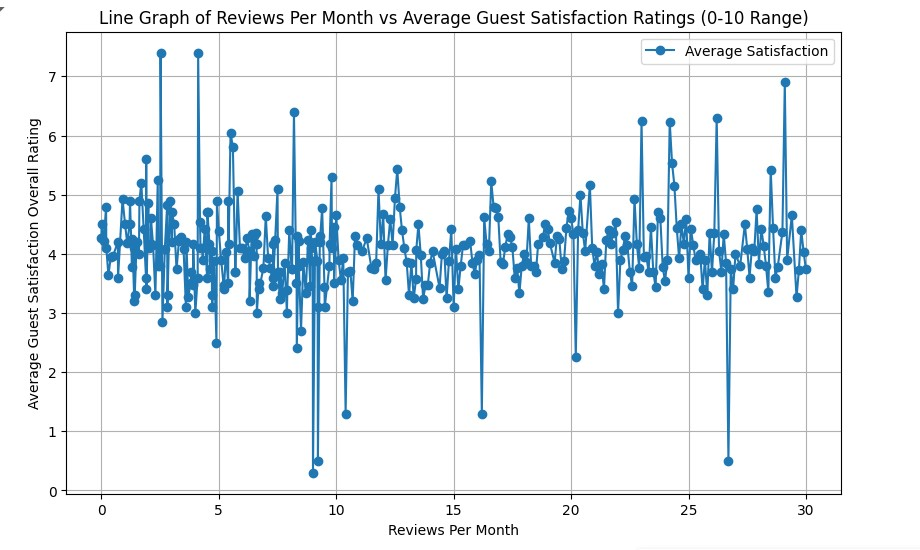

## Sixth Research Question's Visualization Code (Eylül)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/xx/clean_data_end.csv'
# this is the place that we mounted our drive. From the previous notebook we saved the clean data to the csv above.
CleanedData = pd.read_csv(file_path, delimiter=',')


# We need to preprocess data to get mean values for both Revenue data and satisfaction data.
# The following cell is written by this purpose.

YesRealsumData = CleanedData["REALSUM"].where(CleanedData["BIZ"] == 'yes')
NoRealsumData = CleanedData["REALSUM"].where(CleanedData["BIZ"] == 'no')

YesSatisfactionData = CleanedData["GUEST_SATISFACTION_OVERALL"].where(CleanedData["BIZ"] == 'yes')
NoSatisfactionData = CleanedData["GUEST_SATISFACTION_OVERALL"].where(CleanedData["BIZ"] == 'no')

YesRealsumMean = YesRealsumData.mean()
NoRealsumMean = NoRealsumData.mean()

YesSatisfactionMean = YesSatisfactionData.mean()
NoSatisfactionMean = NoSatisfactionData.mean()
import matplotlib.pyplot

# Lets create needed lists so that we can use in axis of the plots we needed.
# These will be the mean values that we calculated in the previous cell.
Categories = ['yes', 'no']
RealsumMeans = [YesRealsumMean, NoRealsumMean]
SatisfactionMeans = [YesSatisfactionMean, NoSatisfactionMean]

# Creating the dual Y-axis chart
Figure, RealsumAxis = matplotlib.pyplot.subplots(figsize=(8, 8))

# We will have 2 separate y axises to show both Guest satisfaction and average earning.
# this is the first axis which is the business friendly listing vs average earnings.
# I decided to choose color red with bar chart to create distinction
RealsumAxis.set_xlabel('Business Friendly Listing')
RealsumAxis.set_ylabel('Average Earnings (REALSUM)', color='red')
RealsumAxis.bar(Categories, RealsumMeans, width=0.5, color='red', label='Average Earnings (REALSUM)')
RealsumAxis.tick_params(axis='y', labelcolor='red')
# I decided to choose color green with tick params for better visibility on gues satisfiction.
SatisfactionAxis=RealsumAxis.twinx()
SatisfactionAxis.set_ylabel('Guest Satisfaction (GUEST SATISFACTION)', color='green')
SatisfactionAxis.plot(Categories, SatisfactionMeans, color='green', marker='o', label='Guest Satisfaction (GUEST SATISFACTION)', linewidth=2)
SatisfactionAxis.tick_params(axis='y', labelcolor='green')
# this is used for better visualization on y axis for the second axis.
# the first axis steps were 50, 100, 150 etc. so this is only applied to second axis.
SatisfactionAxis.set_ylim(4, 4.3)
Figure.suptitle('Average Earnings and Guest Satisfaction by Business Friendly List Category')
matplotlib.pyplot.show()




![WhatsApp Image 2025-01-17 at 01.34.43.jpeg](<attachment:WhatsApp Image 2025-01-17 at 01.34.43.jpeg>)
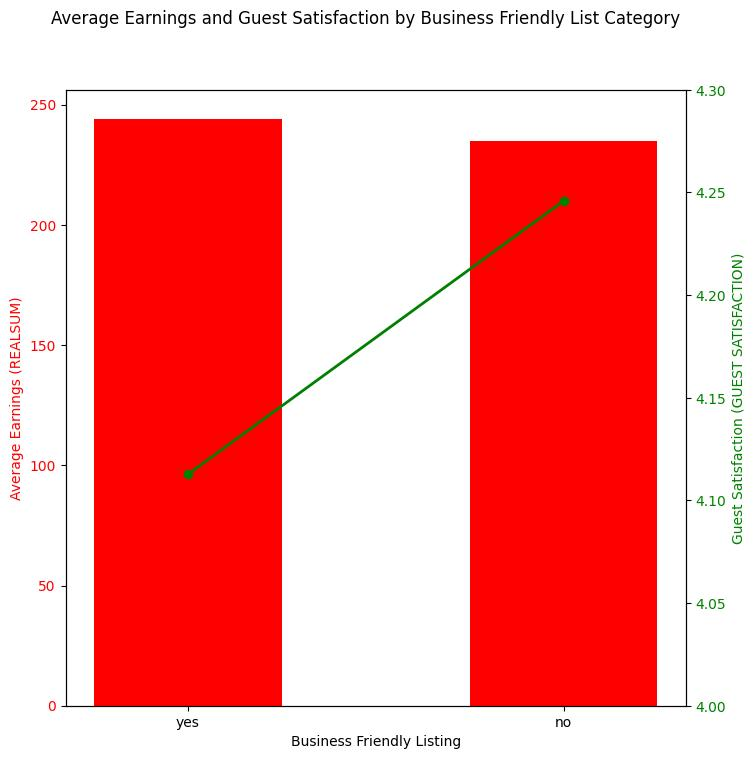

## Seventh Research Question's Visualization Code (Toygun)

### Research Question's Visualization Code Graph1 (Toygun)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # For creating custom legend handles

# File path for the dataset
file_path = "/Users/toyguntez/Downloads/EU_Airbnb_Prices/airbnb_data_geo.csv"

# Load the dataset (adjust the delimiter if needed)
data = pd.read_csv(file_path, delimiter=',')
print("File loaded successfully!")

# Inspect the first few rows and column names
#(I added this part because the code was giving an error and I needed to understand where the error was)
print("Columns in dataset:", data.columns) # Display the column names
print(data.head()) # Display the first few rows of the dataset

# Check if required columns exist
if "DIST" in data.columns and "REALSUM" in data.columns: 
    # Drop missing values in the required columns
    data = data.dropna(subset=["DIST", "REALSUM"]) # Drop rows with missing values in these columns
    print("Missing values removed from required columns.") # Confirmation message

    # Create bins for distances
    data['DIST_BIN'] = pd.cut(
        data['DIST'], 
        bins=[0, 2, 5, 10, 20, 50, 100], # Define the bin edges
        labels=["0-2 km", "2-5 km", "5-10 km", "10-20 km", "20-50 km", "50-100 km"] # Assign labels to the bins
    )
    print("Distance bins created.")

    # Plot histogram
    plt.figure(figsize=(14, 8))
    hist = sns.histplot(
        data=data,
        x="REALSUM", # Earnings
        hue="DIST_BIN", # Distance bins
        multiple="stack", # Stack bars for different distance ranges
        bins=30, # Number of bins
        palette="coolwarm", # Color palette
        edgecolor="black" # Edge color for bars
    )

    # Explicitly add legend manually
    legend_labels = list(data['DIST_BIN'].cat.categories)  # Convert to a list
    legend_colors = sns.color_palette("coolwarm", n_colors=len(legend_labels))  # Match colors to categories
    legend_handles = [
        Line2D([0], [0], color=legend_colors[i], lw=10) for i in range(len(legend_labels))
    ]

    # Add legend with custom handles and labels
    plt.legend(
        handles=legend_handles,
        labels=legend_labels,
        title="Distance Range (km)", # Title for the legend
        fontsize=12,
        title_fontsize=14,
        loc='upper right' # Position of the legend
    )

    # Add titles and labels
    plt.title("Histogram of Earnings Grouped by Distance Ranges", fontsize=16, fontweight='bold') # Title
    plt.xlabel("Earnings (€)", fontsize=14) # X-axis label
    plt.ylabel("Number of Listings", fontsize=14) # Y-axis label
    plt.xticks(fontsize=12) # X-axis tick labels
    plt.yticks(fontsize=12) # Y-axis tick labels
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add gridlines for y-axis
    plt.tight_layout() # Adjust layout for better appearance
    plt.show()
else:
    print("Required columns 'DIST' and 'REALSUM' are missing from the dataset.") # Error message if columns are missing


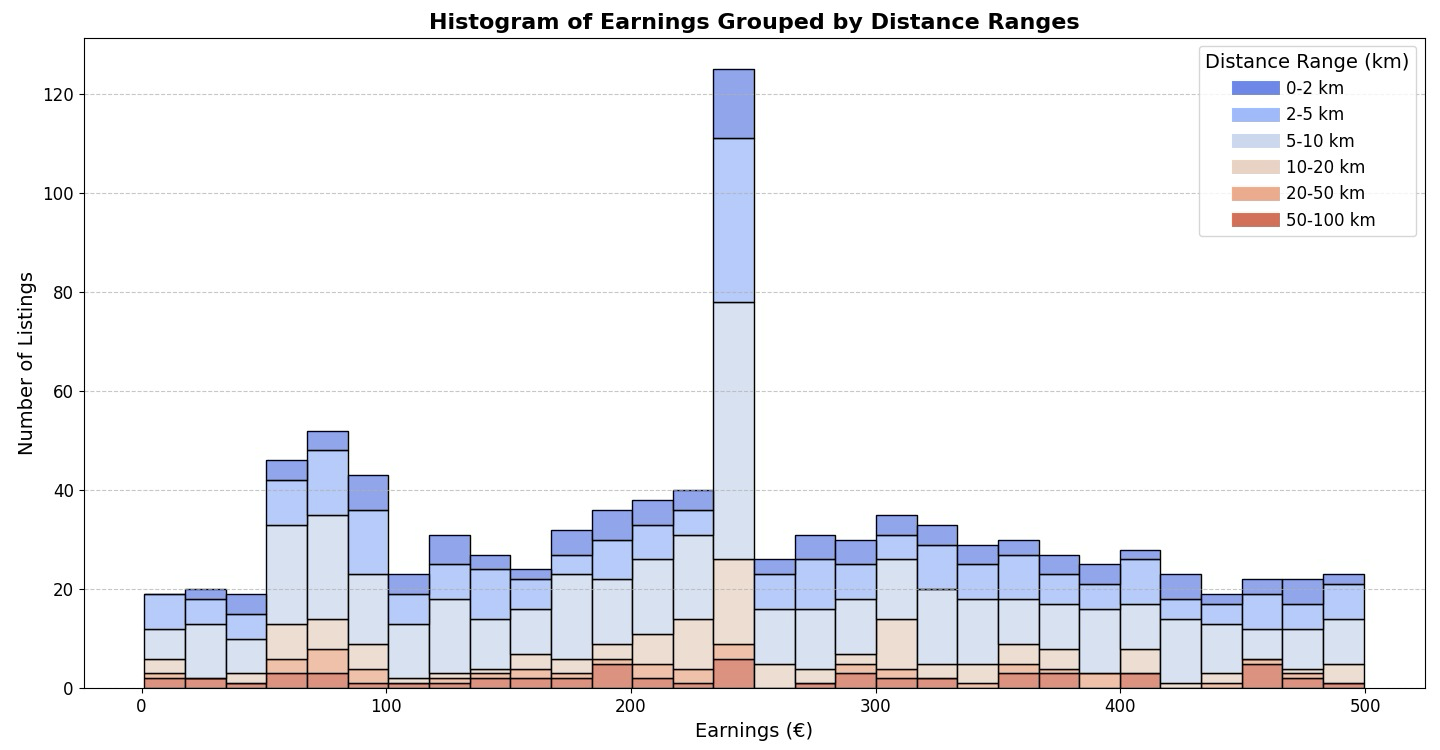

### Research Question's Visualization Code Graph2 (Toygun)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path to the dataset
file_path = "/Users/toyguntez/Downloads/EU_Airbnb_Prices/airbnb_data_geo.csv"

# Load the cleaned dataset into a pandas DataFrame
data_cleaned = pd.read_csv(file_path)

# Define the locations of the 8 cities (longitude, latitude)
city_locations = {
    "Amsterdam": {"lng": 4.8952, "lat": 52.3676},
    "Paris": {"lng": 2.3522, "lat": 48.8566},
    "Barcelona": {"lng": 2.1734, "lat": 41.3851},
    "Rome": {"lng": 12.4964, "lat": 41.9028},
    "London": {"lng": -0.1276, "lat": 51.5074},
    "Brussels": {"lng": 4.3517, "lat": 50.8503},
    "Prague": {"lng": 14.4378, "lat": 50.0755},
    "Istanbul": {"lng": 28.9784, "lat": 41.0082},
}

# Assign unique colors to each city for distinction
city_colors = {
    "Amsterdam": "red",
    "Paris": "blue",
    "Barcelona": "green",
    "Rome": "purple",
    "London": "orange",
    "Brussels": "brown",
    "Prague": "pink",
    "Istanbul": "cyan",
}

# Start creating the scatter plot
plt.figure(figsize=(14, 10))

# Create the scatter plot for all listings
scatter = plt.scatter(
    data_cleaned['LNG'],  # x-axis: Longitude
    data_cleaned['LAT'],  # y-axis: Latitude
    c=data_cleaned['REALSUM'],  # Color intensity based on earnings
    cmap='viridis',  # Colormap for visual appeal
    alpha=0.8,  # Transparency level
    s=10  # Size of each point
)

# Add a colorbar
plt.colorbar(scatter, label='Earnings (€)')

# Plot and label each city with its unique color
for city, coords in city_locations.items():
    plt.scatter(
        coords["lng"],
        coords["lat"],
        color=city_colors[city],
        s=100,
        edgecolor='black',
        label=city
    )  # City marker

# Add labels and a title
plt.title('Geographical Distribution: Longitude vs Latitude (Hue: Earnings)', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Add a legend to show which color corresponds to each city
plt.legend(title="Cities", fontsize=12, title_fontsize=14, loc="upper right")

# Adjust plot limits for better visualization of city labels
plt.xlim(data_cleaned['LNG'].min() - 1, data_cleaned['LNG'].max() + 1)
plt.ylim(data_cleaned['LAT'].min() - 1, data_cleaned['LAT'].max() + 1)

# Display the plot
plt.show()


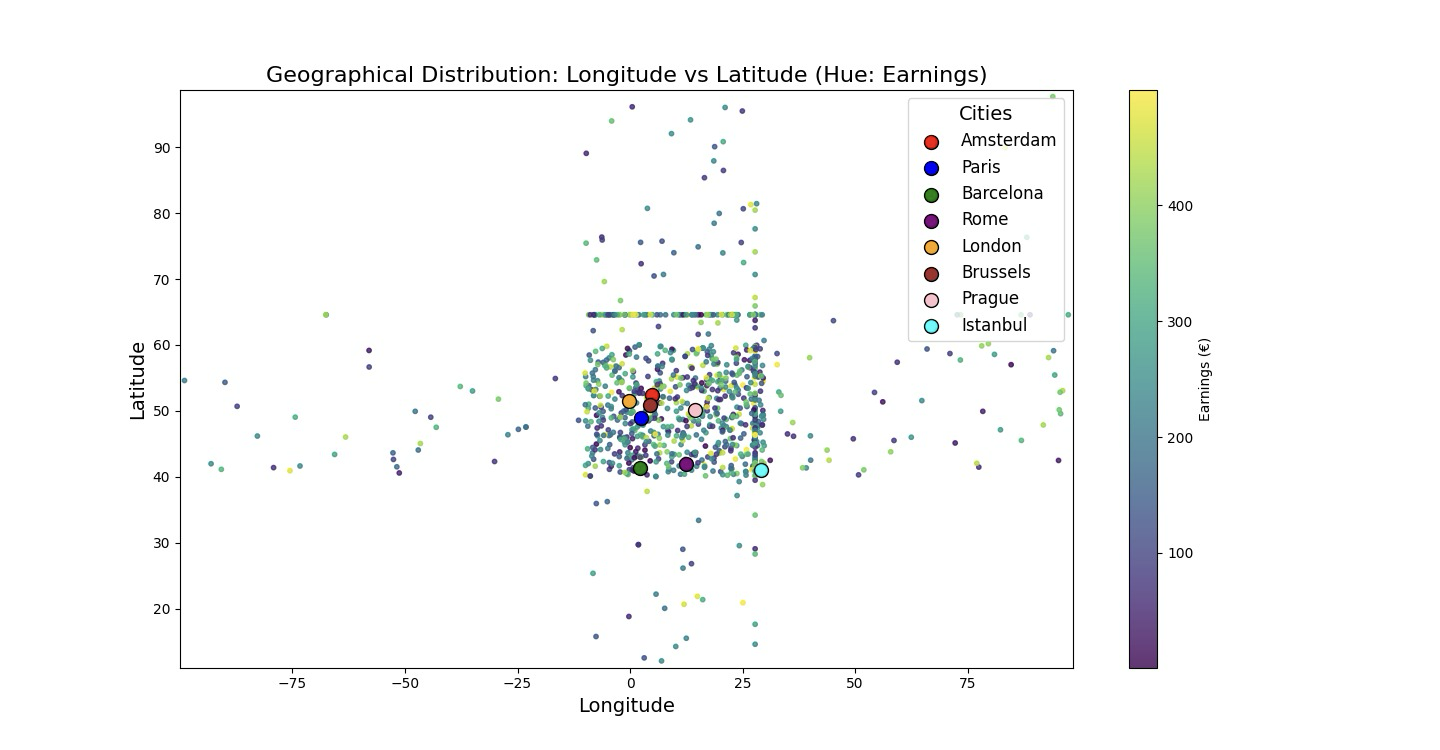

### Research Question's Visualization Code Graph3 (Toygun)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File path for the dataset
file_path = "/Users/toyguntez/Downloads/EU_Airbnb_Prices/airbnb_data_geo.csv"

# Load the cleaned dataset
data_cleaned = pd.read_csv(file_path)

# Define the locations of the 8 cities (longitude, latitude)
city_locations = {
    "Amsterdam": {"lng": 4.8952, "lat": 52.3676},
    "Paris": {"lng": 2.3522, "lat": 48.8566},
    "Barcelona": {"lng": 2.1734, "lat": 41.3851},
    "Rome": {"lng": 12.4964, "lat": 41.9028},
    "London": {"lng": -0.1276, "lat": 51.5074},
    "Brussels": {"lng": 4.3517, "lat": 50.8503},
    "Prague": {"lng": 14.4378, "lat": 50.0755},
    "Istanbul": {"lng": 28.9784, "lat": 41.0082},
}

# Assign unique colors to each city for distinction
city_colors = {
    "Amsterdam": "red",
    "Paris": "blue",
    "Barcelona": "green",
    "Rome": "purple",
    "London": "orange",
    "Brussels": "brown",
    "Prague": "pink",
    "Istanbul": "cyan",
}

# Start creating the scatter plot
plt.figure(figsize=(14, 10))

# Scatter plot for all listings
scatter = plt.scatter(
    data_cleaned['LNG'],  # x-axis: Longitude
    data_cleaned['LAT'],  # y-axis: Latitude
    c=data_cleaned['GUEST_SATISFACTION_OVERALL'],  # Color intensity based on Guest Satisfaction
    cmap='coolwarm',  # Colormap for visual appeal
    alpha=0.8,  # Transparency level
    s=10  # Size of each point
)

# Add a colorbar
plt.colorbar(scatter, label='Guest Satisfaction')

# Plot and label each city with its unique color
for city, coords in city_locations.items():
    plt.scatter(
        coords["lng"],
        coords["lat"],
        color=city_colors[city],
        s=100,
        edgecolor='black',
        label=city  # Add label for the legend
    )  # City marker

# Add labels and a title
plt.title('Geographical Distribution: Longitude vs Latitude (Hue: Guest Satisfaction)', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Add a legend to identify which color corresponds to each city
plt.legend(title="Cities", fontsize=12, title_fontsize=14, loc="upper right")

# Adjust plot limits for better visualization
plt.xlim(data_cleaned['LNG'].min() - 1, data_cleaned['LNG'].max() + 1)
plt.ylim(data_cleaned['LAT'].min() - 1, data_cleaned['LAT'].max() + 1)

# Display the plot
plt.show()


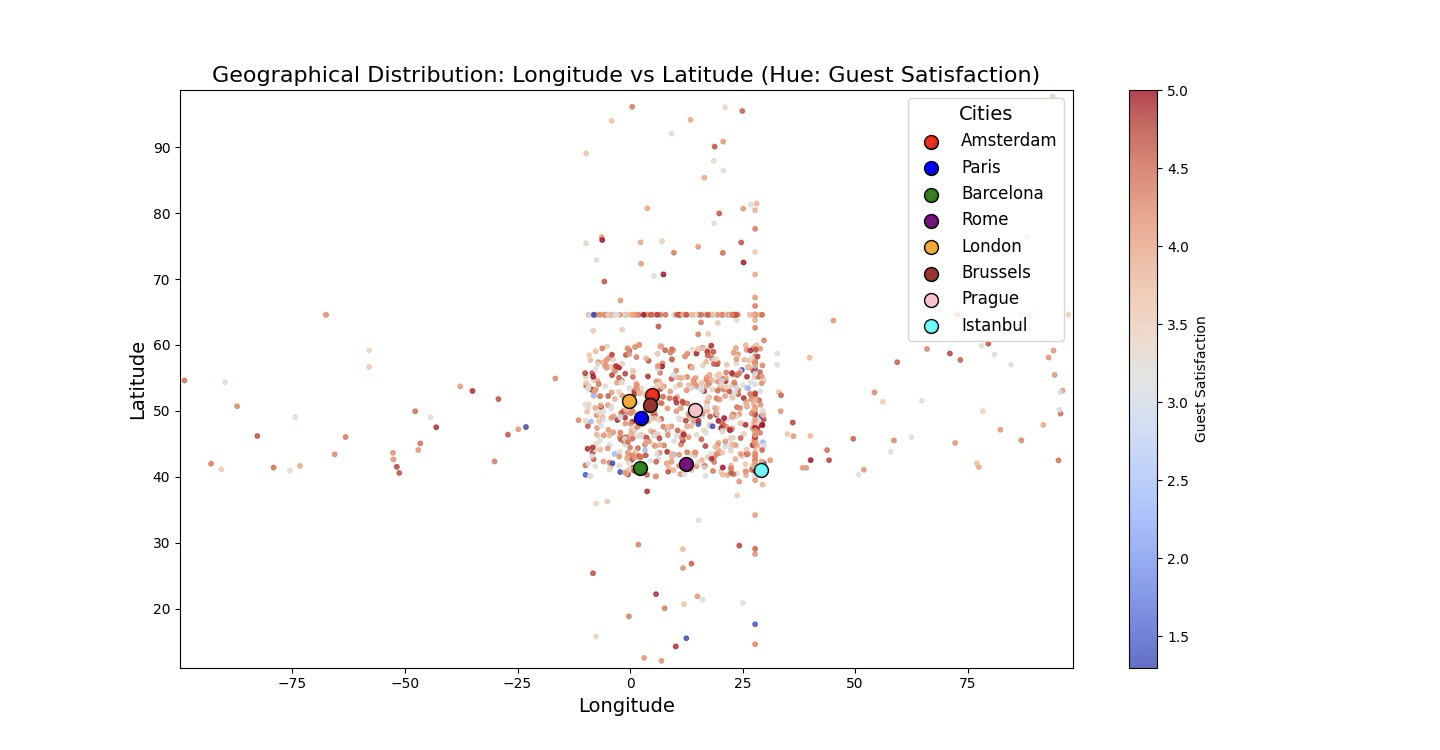

### Research Question's Visualization Code Graph4 (Toygun)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File path for the dataset
file_path = "/Users/toyguntez/Downloads/EU_Airbnb_Prices/airbnb_data_geo.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Check if the required columns exist
if "DIST" in data.columns and "GUEST_SATISFACTION_OVERALL" in data.columns and "REALSUM" in data.columns:
    # Drop missing values for the required columns
    data = data.dropna(subset=["DIST", "GUEST_SATISFACTION_OVERALL", "REALSUM"])

    # Create a figure with two scatter plots side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

    # Scatter plot: Distance vs Guest Satisfaction
    axes[0].scatter(data["DIST"], data["GUEST_SATISFACTION_OVERALL"], alpha=0.6, color="blue") # Adjust alpha for transparency
    axes[0].set_title("Distance vs Guest Satisfaction", fontsize=14) # Set title for the plot
    axes[0].set_xlabel("Distance from Landmark (km)", fontsize=12) # Set x-axis label
    axes[0].set_ylabel("Guest Satisfaction Level", fontsize=12) # Set y-axis label
    axes[0].grid(alpha=0.4) # Add grid lines with transparency

    # Scatter plot: Distance vs Earnings
    axes[1].scatter(data["DIST"], data["REALSUM"], alpha=0.6, color="green") # Adjust alpha for transparency
    axes[1].set_title("Distance vs Earnings", fontsize=14) # Set title for the plot
    axes[1].set_xlabel("Distance from Landmark (km)", fontsize=12) # Set x-axis label
    axes[1].set_ylabel("Earnings (€)", fontsize=12) # Set y-axis label
    axes[1].grid(alpha=0.4) # Add grid lines with transparency

    # Adjust layout
    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'DIST', 'GUEST_SATISFACTION_OVERALL', or 'REALSUM' are missing from the dataset.") 


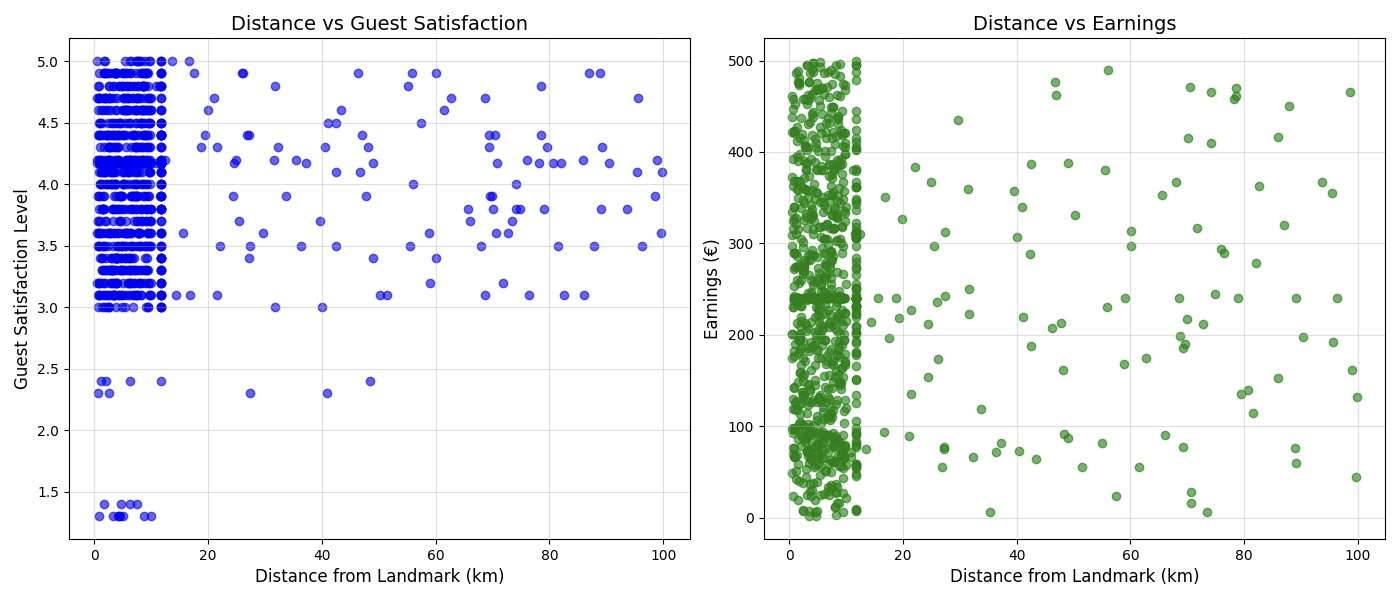